In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
from cycler import cycler
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# Explanatory analysis of the tags

## pre-train

In [ ]:
# load data
ptags = pd.read_csv('./data/pre-train_tags.csv',index_col=0)
pre_training_tags = ptags[ptags['agree'] == 1]
pre_training_tags

In [99]:
pre_training_tags['Cat'].value_counts()

c     388
do    173
di    164
l     124
t      50
u       2
Name: Cat, dtype: int64

<Axes: >

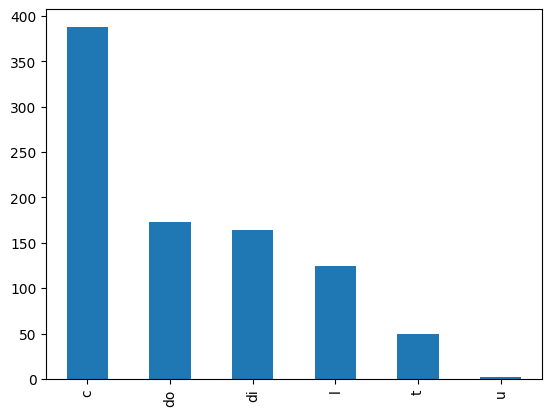

In [100]:
pre_training_tags['Cat'].value_counts().plot(kind='bar')

## Fine-tune


In [ ]:
# load data
ftags = pd.read_csv('./data/fine-tune_tags.csv',index_col=0)
fine_tuning_tags = ftags[ftags['agree'] == 1]

In [126]:
fine_tuning_tags['Cat'].value_counts()

do    291
l     284
c     223
di    117
u       8
t       2
Name: Cat, dtype: int64

<Axes: >

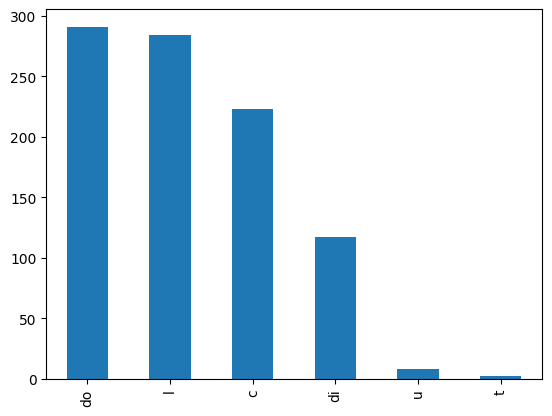

In [103]:
fine_tuning_tags['Cat'].value_counts().plot(kind='bar')

# Pre-training experiments

### Samples memorized per model size and categories - base model attack

tot tags pre train

In [105]:
tot_tags_pre = pre_training_tags[['3b_ep0_p100_em', 'Cat']].groupby('Cat').count()
tot_tags_pre 
tot_tags_pre['3b_ep0_p100_em']

Cat
c     388
di    164
do    173
l     124
t      50
u       2
Name: 3b_ep0_p100_em, dtype: int64

#### Heatmpap with absolute values

In [106]:
ep0_cat_3b = pre_training_tags[pre_training_tags['3b_ep0_p100_em'] == 1 ][['3b_ep0_p100_em', 'Cat']].groupby('Cat').count()
ep0_cat_7b = pre_training_tags[pre_training_tags['7b_ep0_p100_em'] == 1 ][['7b_ep0_p100_em', 'Cat']].groupby('Cat').count()
ep0_cat_15b = pre_training_tags[pre_training_tags['15b_ep0_p100_em'] == 1 ][['15b_ep0_p100_em', 'Cat']].groupby('Cat').count()
ep0_cat = ep0_cat_3b.join(ep0_cat_7b, lsuffix='_3b', rsuffix='_7b').join(ep0_cat_15b, rsuffix='_15b').loc[['c', 'di', 'do', 'l', 't']]
ep0_cat = ep0_cat.rename(columns={'3b_ep0_p100_em': '3b', '7b_ep0_p100_em': '7b', '15b_ep0_p100_em': '15b'})

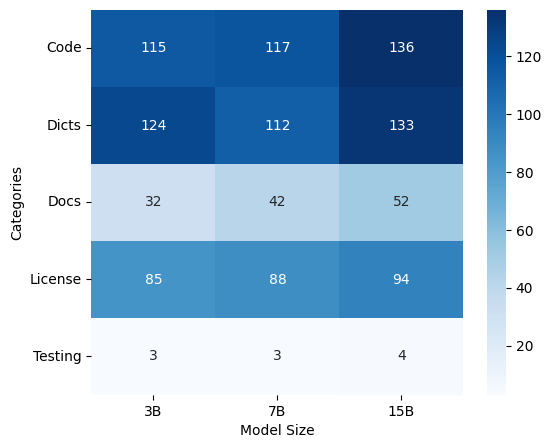

In [107]:
# Create the heatmap
plt.figure(figsize=(6, 5))  # Adjust the size as needed
ax = sns.heatmap(ep0_cat, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set the title and labels
#ax.set_title('Heatmap with Annotations')
ax.set_ylabel('Categories')
ax.set_xlabel('Model Size')
ax.set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
ax.set_xticklabels(['3B', '7B', '15B'], rotation=0)


# Show the plot
plt.show()

#### Barplot stacked

In [108]:
pre = tot_tags_pre['3b_ep0_p100_em'].loc[['c', 'di', 'do', 'l', 't']]

In [109]:
ep0_cat['15b']

Cat
c     136
di    133
do     52
l      94
t       4
Name: 15b, dtype: int64

/var/folders/zj/38lg5jln36g50d0zs68fcfv00000gn/T/ipykernel_7953/2191085355.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'])


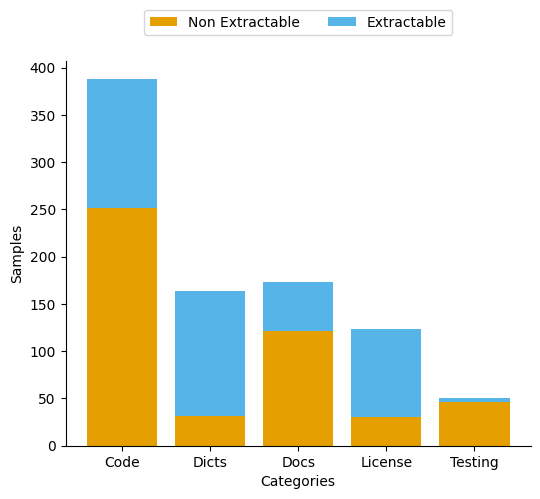

In [110]:

plt.rc("axes", prop_cycle=line_cycler)
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed

# First bar plot (Non Extractable)
ax.bar(ep0_cat.index, pre - ep0_cat['15b'], label='Non Extractable')

# Second bar plot (Extractable) stacked on top of the first one
ax.bar(ep0_cat.index, ep0_cat['15b'], bottom=pre - ep0_cat['15b'], label='Extractable')


# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Categories')
ax.set_ylabel('Samples')
ax.set_xticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
fig.savefig('./tag_mem_ptrain_absolute.pdf', format='pdf')

#### With the percentages, compared to the total number of tags for each category

In [111]:
ep0_cat_3b = (pre_training_tags[pre_training_tags['3b_ep0_p100_em'] == 1 ][['3b_ep0_p100_em', 'Cat']].groupby('Cat').count() ) 
ep0_cat_7b = (pre_training_tags[pre_training_tags['7b_ep0_p100_em'] == 1 ][['7b_ep0_p100_em', 'Cat']].groupby('Cat').count() ) 
ep0_cat_15b = (pre_training_tags[pre_training_tags['15b_ep0_p100_em'] == 1 ][['15b_ep0_p100_em', 'Cat']].groupby('Cat').count()) 

ep0_cat_3b['3b_ep0_p100_em'] = ep0_cat_3b['3b_ep0_p100_em'] / tot_tags_pre['3b_ep0_p100_em'] * 100
ep0_cat_7b['7b_ep0_p100_em'] = ep0_cat_7b['7b_ep0_p100_em'] / tot_tags_pre['3b_ep0_p100_em'] * 100
ep0_cat_15b['15b_ep0_p100_em'] = ep0_cat_15b['15b_ep0_p100_em'] / tot_tags_pre['3b_ep0_p100_em'] * 100

ep0_cat_perc = ep0_cat_3b.join(ep0_cat_7b, lsuffix='_3b', rsuffix='_7b').join(ep0_cat_15b, rsuffix='_15b').loc[['c', 'di', 'do', 'l', 't']]
ep0_cat_perc = ep0_cat_perc.rename(columns={'3b_ep0_p100_em': '3b', '7b_ep0_p100_em': '7b', '15b_ep0_p100_em': '15b'})
ep0_cat_perc

,3b,7b,15b
Cat,,,
c,29.639175,30.154639,35.051546
di,75.609756,68.292683,81.097561
do,18.497110,24.277457,30.057803
l,68.548387,70.967742,75.806452
t,6.000000,6.000000,8.000000


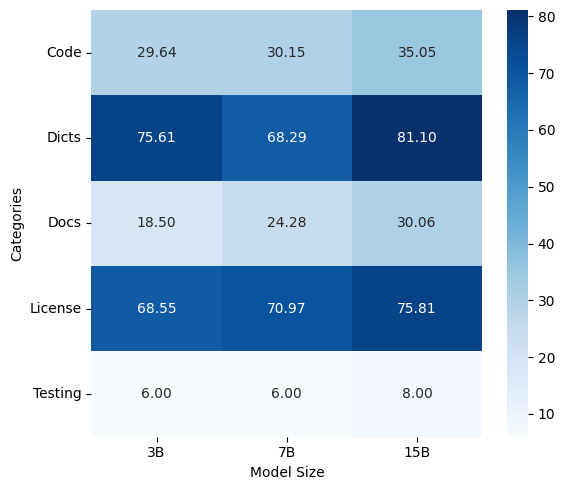

In [112]:
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed
# Create the heatmap
ax = sns.heatmap(ep0_cat_perc, annot=True, fmt='.2f', cmap='Blues', cbar=True)

# Set the title and labels
#ax.set_title('Heatmap with Annotations')
ax.set_ylabel('Categories')
ax.set_xlabel('Model Size')
ax.set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
ax.set_xticklabels(['3B', '7B', '15B'], rotation=0)

# Adjust the layout to make sure everything fits
plt.tight_layout()


# Show the plot
plt.show()
fig.savefig('./tag_mem_ptrain_perc.pdf', format='pdf')

### Samples memorized per model size and categories - fine-tune model attack

#### Heatmap absolute values

In [127]:
ep3_cat_3b = pre_training_tags[pre_training_tags['3b_ep3_p100_em'] == 1 ][['3b_ep3_p100_em', 'Cat']].groupby('Cat').count()
ep3_cat_7b = pre_training_tags[pre_training_tags['7b_ep3_p100_em'] == 1 ][['7b_ep3_p100_em', 'Cat']].groupby('Cat').count()
ep3_cat_15b = pre_training_tags[pre_training_tags['15b_ep3_p100_em'] == 1 ][['15b_ep3_p100_em', 'Cat']].groupby('Cat').count()

ep3_cat = ep3_cat_3b.join(ep3_cat_7b, lsuffix='_3b', rsuffix='_7b').join(ep3_cat_15b, rsuffix='_15b').loc[['c', 'di', 'do', 'l', 't']]
ep3_cat = ep3_cat.rename(columns={'3b_ep3_p100_em': '3b', '7b_ep3_p100_em': '7b', '15b_ep3_p100_em': '15b'})

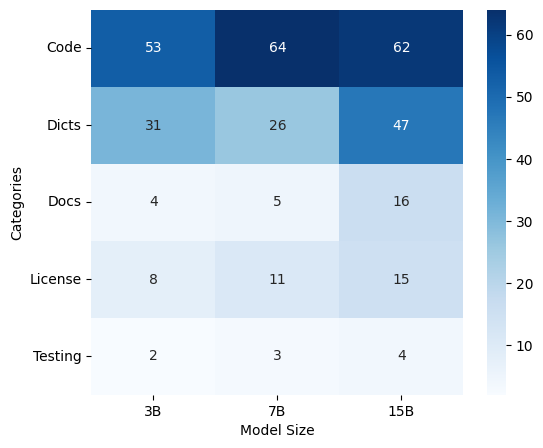

In [128]:
# Create the heatmap
plt.figure(figsize=(6, 5))  # Adjust the size as needed
ax = sns.heatmap(ep3_cat, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set the title and labels
#ax.set_title('Heatmap with Annotations')
ax.set_ylabel('Categories')
ax.set_xlabel('Model Size')
ax.set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
ax.set_xticklabels(['3B', '7B', '15B'], rotation=0)


# Show the plot
plt.show()

Percentage variation

In [62]:
((ep3_cat-ep0_cat)/ep0_cat)*100

,3b,7b,15b
Cat,,,
c,-53.781513,-46.341463,-54.545455
di,-75.000000,-76.724138,-64.705882
do,-85.000000,-86.538462,-69.841270
l,-91.752577,-88.888889,-85.046729
t,-33.333333,0.000000,25.000000


#### With the percentages, compared to the total number of tags for each category

In [115]:
ep3_cat_3b = pre_training_tags[pre_training_tags['3b_ep3_p100_em'] == 1 ][['3b_ep3_p100_em', 'Cat']].groupby('Cat').count()
ep3_cat_7b = pre_training_tags[pre_training_tags['7b_ep3_p100_em'] == 1 ][['7b_ep3_p100_em', 'Cat']].groupby('Cat').count()
ep3_cat_15b = pre_training_tags[pre_training_tags['15b_ep3_p100_em'] == 1 ][['15b_ep3_p100_em', 'Cat']].groupby('Cat').count()

ep3_cat_3b['3b_ep3_p100_em'] = ep3_cat_3b['3b_ep3_p100_em'] / tot_tags_pre['3b_ep0_p100_em'] * 100
ep3_cat_7b['7b_ep3_p100_em'] = ep3_cat_7b['7b_ep3_p100_em'] / tot_tags_pre['3b_ep0_p100_em'] * 100
ep3_cat_15b['15b_ep3_p100_em'] = ep3_cat_15b['15b_ep3_p100_em'] / tot_tags_pre['3b_ep0_p100_em'] * 100

ep3_cat_perc = ep3_cat_3b.join(ep3_cat_7b, lsuffix='_3b', rsuffix='_7b').join(ep3_cat_15b, rsuffix='_15b').loc[['c', 'di', 'do', 'l', 't']]
ep3_cat_perc = ep3_cat_perc.rename(columns={'3b_ep3_p100_em': '3b', '7b_ep3_p100_em': '7b', '15b_ep3_p100_em': '15b'})
ep3_cat_perc

,3b,7b,15b
Cat,,,
c,13.659794,16.494845,15.979381
di,18.902439,15.853659,28.658537
do,2.312139,2.890173,9.248555
l,6.451613,8.870968,12.096774
t,4.000000,6.000000,8.000000


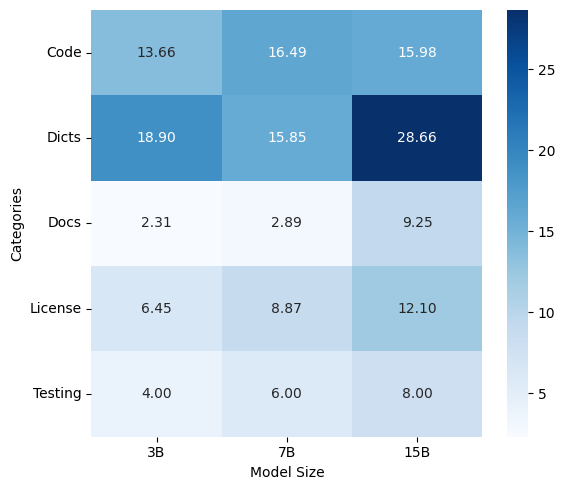

In [116]:
# Create the heatmap
plt.figure(figsize=(6, 5))  # Adjust the size as needed
ax = sns.heatmap(ep3_cat_perc, annot=True, fmt='.2f', cmap='Blues', cbar=True)

# Set the title and labels
#ax.set_title('Heatmap with Annotations')
ax.set_ylabel('Categories')
ax.set_xlabel('Model Size')
ax.set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
ax.set_xticklabels(['3B', '7B', '15B'], rotation=0)


plt.tight_layout()
# Show the plot
plt.show()

## Put the percentages in one single plot:

In [65]:
ep0_cat_perc

,3b,7b,15b
Cat,,,
c,29.238329,30.221130,35.135135
di,73.988439,67.052023,78.612717
do,18.691589,24.299065,29.439252
l,69.285714,70.714286,76.428571
t,4.687500,4.687500,6.250000


In [66]:
ep3_cat_perc

,3b,7b,15b
Cat,,,
c,13.513514,16.216216,15.970516
di,18.497110,15.606936,27.745665
do,2.803738,3.271028,8.878505
l,5.714286,7.857143,11.428571
t,3.125000,4.687500,7.812500


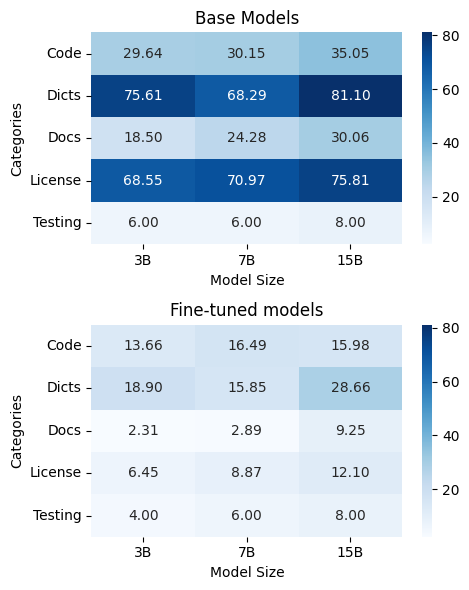

In [117]:
# Determine the global min and max values for the color scale
vmin = min(ep0_cat_perc.min().min(), ep3_cat_perc.min().min())
vmax = max(ep0_cat_perc.max().max(), ep3_cat_perc.max().max())

# Create subplots with a vertical stack
fig, axes = plt.subplots(2, 1, figsize=(5, 6))  # Adjust figsize for vertical layout

# Plot the first heatmap
sns.heatmap(ep0_cat_perc, annot=True, fmt='.2f', cmap='Blues', cbar=True, ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title('Base Models')
axes[0].set_ylabel('Categories')
axes[0].set_xlabel('Model Size')
axes[0].set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
axes[0].set_xticklabels(['3B', '7B', '15B'], rotation=0)

# Plot the second heatmap
sns.heatmap(ep3_cat_perc.to_numpy(), annot=True, fmt='.2f', cmap='Blues', cbar=True, ax=axes[1], vmin=vmin, vmax=vmax)
#sns.heatmap(ep3_cat_perc.to_numpy(), annot=True, fmt='.2f', cmap='Blues', cbar=True, ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title('Fine-tuned models')
axes[1].set_ylabel('Categories')
axes[1].set_xlabel('Model Size')
axes[1].set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
axes[1].set_xticklabels(['3B', '7B', '15B'], rotation=0)

plt.tight_layout()
# Save the plot as a PDF
plt.savefig('./tag_mem_ptrain_perc.pdf', format='pdf')
# Show the plot
plt.show()

# Fine-tuning experiments

Total tags fine-tuning samples

In [130]:
tot_tags_tune = fine_tuning_tags[['3b_ep0_d3_em', 'Cat']].groupby('Cat').count()
tot_tags_tune

,3b_ep0_d3_em
Cat,
c,223
di,117
do,291
l,284
t,2
u,8


### Absolute values

In [131]:
ep3_cat_3b = fine_tuning_tags[fine_tuning_tags['3b_ep3_d3_em'] == 1 ][['3b_ep3_d3_em', 'Cat']].groupby('Cat').count()
ep3_cat_7b = fine_tuning_tags[fine_tuning_tags['7b_ep3_d3_em'] == 1 ][['7b_ep3_d3_em', 'Cat']].groupby('Cat').count()
ep3_cat_15b = fine_tuning_tags[fine_tuning_tags['15b_ep3_d3_em'] == 1 ][['15b_ep3_d3_em', 'Cat']].groupby('Cat').count()
ep3_cat = ep3_cat_3b.join(ep3_cat_7b, lsuffix='_3b', rsuffix='_7b').join(ep3_cat_15b, rsuffix='_15b').loc[['c', 'di', 'do', 'l', 't']]
ep3_cat = ep3_cat.rename(columns={'3b_ep3_d3_em': '3b', '7b_ep3_d3_em': '7b', '15b_ep3_d3_em': '15b'})
#ep3_cat = ep3_cat.loc[['c', 'di', 'do', 'l']]
ep3_cat

,3b,7b,15b
Cat,,,
c,56,53,88
di,54,52,64
do,104,123,137
l,185,181,195
t,1,1,1


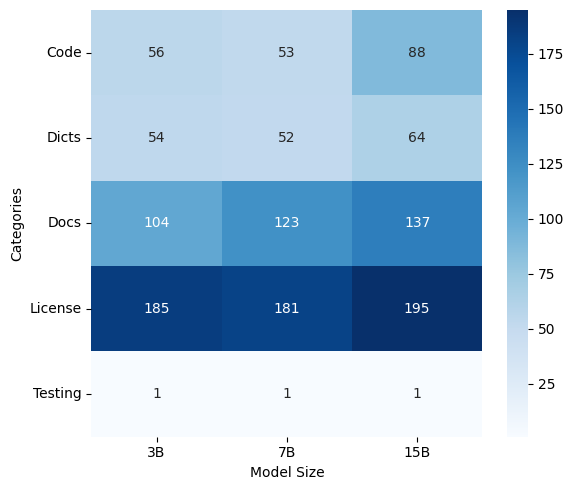

In [132]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed
ax = sns.heatmap(ep3_cat, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set the title and labels
#ax.set_title('Heatmap with Annotations')
ax.set_ylabel('Categories')
ax.set_xlabel('Model Size')
ax.set_yticklabels(['Code', 'Dicts', 'Docs', 'License', 'Testing'], rotation=0)
ax.set_xticklabels(['3B', '7B', '15B'], rotation=0)

fig.tight_layout()
# Show the plot
plt.show()

### Barplot

In [273]:
fine = tot_tags_tune['3b_ep0_d3_em'].loc[['c', 'di', 'do', 'l']]
fine

Cat
c     261
di    123
do    312
l     293
Name: 3b_ep0_d3_em, dtype: int64

/var/folders/zj/38lg5jln36g50d0zs68fcfv00000gn/T/ipykernel_92730/2071651019.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Code', 'Dicts', 'Docs', 'License'])


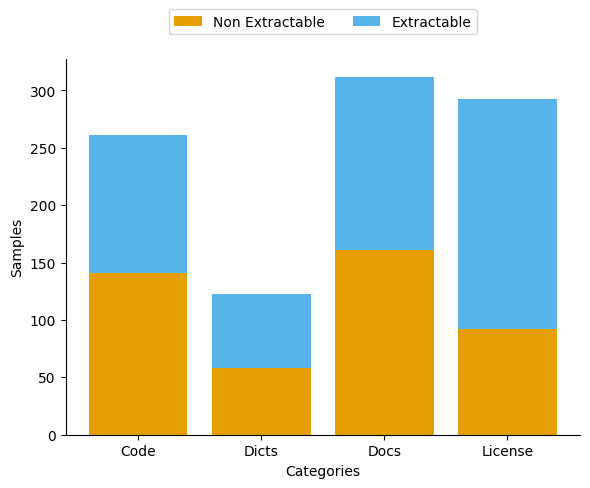

In [275]:

plt.rc("axes", prop_cycle=line_cycler)
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the size as needed

# First bar plot (Non Extractable)
ax.bar(ep3_cat.index, fine - ep3_cat['15b'], label='Non Extractable')

# Second bar plot (Extractable) stacked on top of the first one
ax.bar(ep3_cat.index, ep3_cat['15b'], bottom=fine - ep3_cat['15b'], label='Extractable')


# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position("left")
#ax.xaxis.set_ticks_position("bottom")

#ax.set_title('Data extraction attack through epochs')
ax.set_xlabel('Categories')
ax.set_ylabel('Samples')
ax.set_xticklabels(['Code', 'Dicts', 'Docs', 'License'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('./tag_mem_ftune_absolute.pdf', format='pdf')

### With the percentages, compared to the total number of tags for each category

In [160]:
ep3_cat_3b = fine_tuning_tags[fine_tuning_tags['3b_ep3_d3_em'] == 1 ][['3b_ep3_d3_em', 'Cat']].groupby('Cat').count()
ep3_cat_7b = fine_tuning_tags[fine_tuning_tags['7b_ep3_d3_em'] == 1 ][['7b_ep3_d3_em', 'Cat']].groupby('Cat').count()
ep3_cat_15b = fine_tuning_tags[fine_tuning_tags['15b_ep3_d3_em'] == 1 ][['15b_ep3_d3_em', 'Cat']].groupby('Cat').count()

ep3_cat_3b['3b_ep3_d3_em'] = ep3_cat_3b['3b_ep3_d3_em'] / tot_tags_tune['3b_ep0_d3_em'] * 100
ep3_cat_7b['7b_ep3_d3_em'] = ep3_cat_7b['7b_ep3_d3_em'] / tot_tags_tune['3b_ep0_d3_em'] * 100
ep3_cat_15b['15b_ep3_d3_em'] = ep3_cat_15b['15b_ep3_d3_em'] / tot_tags_tune['3b_ep0_d3_em'] * 100

ep3_cat = ep3_cat_3b.join(ep3_cat_7b, lsuffix='_3b', rsuffix='_7b').join(ep3_cat_15b, rsuffix='_15b').loc[['c', 'di', 'do', 'l', 't']]
ep3_cat = ep3_cat.rename(columns={'3b_ep3_p100_em': '3b', '7b_ep3_p100_em': '7b', '15b_ep3_p100_em': '15b'})

ep3_cat


,3b_ep3_d3_em,7b_ep3_d3_em,15b_ep3_d3_em
Cat,,,
c,25.112108,23.766816,39.461883
di,46.153846,44.444444,54.700855
do,35.738832,42.268041,47.079038
l,65.140845,63.732394,68.661972
t,50.000000,50.000000,50.000000


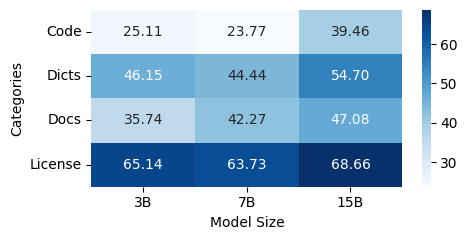

In [161]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 2.5))  # Adjust the size as needed
ax = sns.heatmap(ep3_cat.loc[['c', 'di', 'do', 'l']], annot=True, fmt='.2f', cmap='Blues', cbar=True)

# Set the title and labels
#ax.set_title('Heatmap with Annotations')
ax.set_ylabel('Categories')
ax.set_xlabel('Model Size')
ax.set_yticklabels(['Code', 'Dicts', 'Docs', 'License'], rotation=0)
ax.set_xticklabels(['3B', '7B', '15B'], rotation=0)

fig.tight_layout()
# Show the plot
plt.show()
fig.savefig('./tag_mem_ftune_perc.pdf', format='pdf')